In [3]:
# Peter Karras 2020
''' Contains the Custom Dataset creation and the CNN
    NOTE: MUST HAVE FILE FROM MAKEMASTER PROGRAM PRIOR TO RUNNING'''

' Contains the Custom Dataset creation and the CNN\n    NOTE: MUST HAVE FILE FROM MAKEMASTER PROGRAM PRIOR TO RUNNING'

In [4]:
#Time: 401.0922603607178s for 10,000 files
#max is: 43.8977567043499
#max is: 22.0574247607658
# Time: 153.2100191116333 for 4,000 files
# max is: 40.046902918943
# max is: 22.0574247607658
# Time: 98.4042558670044 for 2,500 files
# max is: 40.508388402478
# min is: 24.8413349715329
# Time: 33.11633038520813 for 933 files
# max is: 40.3920694022969
# min is: 24.8413349715329
# Time: for 9000 files
# max is: 43.85429664867971
# min is: 21.584069668121902

# FULL 55000
#Time taken (s): 45913.3
#Max value is: 43.8977567043499
#Min value is: 21.584069668121902

# March
#Time: 187.95090889930725
#max is: 40.342822540551296
#min is: 22.0574247607658
# April
# Time: 286.47614312171936
# max is: 43.8977567043499
# min is: 23.0867814341884
# May
# Time: 355.6945369243622
# max is: 41.651975331159896
# min is: 22.549667363426103
# June
# Time: 258.5124309062958
# max is: 42.1865665374543
# min is: 24.2563848704595
# July
# Time: 117.10082149505615
# max is: 40.3920694022969
# min is: 23.3752163703192
# August
# Time: 167.5036985874176
# max is: 40.1815051816256
# min is: 22.1157735577469
# Sep
# Time: 252.0023398399353
# max is: 43.200494433666
# min is: 21.9034323541466
# Morn
# Time: 542.1251473999982
# max is: 43.8977567043499
# min is: 22.0574247607658
# Afternoon
# Time: 136.8002856000021
# max is: 43.235454379802796
# min is: 22.014967836717897
# Night 2-9
#Time: 655.5211607999954
#max is: 40.432346810251296
#min is: 21.584069668121902
# DAytime
#Time: 1074.7459823999998
#max is: 43.8977567043499
#min is: 21.584069668121902
"""
epochinfotime
"""
# 3batchsize Epochs for 55,000 take 1446 s per epoch
# Epochs for 10,000 files take 280 s per epoch
# Epochs for 4,000 files take 101 s per epoch
# Epochs for 2,500 files take 65 s per epoch
# Epochs for 933 files take 24 s per epoch

""" 
EPOCH TIME CALC
"""
fileSize = 4000
minutesToTrain = 20
secondsPerEpoch = (0.0287*(fileSize) - 6.4268)
secondsToTrain = minutesToTrain * 60.0
epochsToUse = secondsToTrain/secondsPerEpoch
print("To train for", minutesToTrain, "minutes use", epochsToUse, "epochs") 

To train for 20 minutes use 11.072848268760174 epochs


In [5]:
""" IMPORT NEEDED MODULES """

import pandas as pd
import os
import sys
import csv
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

import time
from datetime import datetime

import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data.dataset import Dataset  # For custom datasets

In [6]:
# Issues with directories, use this to reset cwd and then move into desired directory 
#os.chdir("/content")
startingDir = os.getcwd()
if startingDir != r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/":
    startingDir = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/"
print(startingDir)
csvfilesMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdataFULL/BCIML_Dataset"
baseSaveLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new/BCI-ML/Monthly_Data_Summaries_csv"

C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/


In [7]:
""" CREATE CUSTOM DATASET """
# Pulls from pool of 900 thermal images
class BCIDataset2(Dataset):
    def __init__(self, csv_master_path, transform=None):
        """
        Args:
            csv_master_path (string): path to csv file with thermal image (csv's) file paths
            as first column and GPP values as the second column, rows are one set of
            correlating data points
            transform (callable, optional): Optional transform to be applied on a sample
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file 
        #self.data_info = pd.read_csv(csv_master_path, header=None)
        self.data_info = pd.read_csv(csv_master_path)
        # First column contains thermal image (csv's) file paths
        self.thermal_path_arr = np.asarray(self.data_info.iloc[:,0])
        # Second column is the GPP values for the images from first column
        self.GPP_arr = np.asarray(self.data_info.iloc[:,1])        
        self.transform = transforms.ToTensor()
        max_list = np.full(1,-10)
        min_list = np.full(1, 99999)
        os.chdir(csvfilesMLLocation)
        start = time.perf_counter()
#         for filename in self.thermal_path_arr:
#             file_temps = pd.read_csv(filename)
#             file_temps_vals = file_temps.values
#             torch_temps = torch.from_numpy(file_temps_vals)
#             max_list = np.append(max_list, [torch.max(torch_temps)])
#             min_list = np.append(min_list, [torch.min(torch_temps)])
#         self.ABS_MAX = (torch.max(torch.from_numpy(max_list))).item()
#         self.ABS_MIN = (torch.min(torch.from_numpy(min_list))).item()
        self.ABS_MAX = 43.8977567043499
        self.ABS_MIN = 21.584069668121902
        print(f'Time: {time.perf_counter()-start}')
        print("max is:", self.ABS_MAX)
        print("min is:", self.ABS_MIN)
            
        
    #NOTE: might need to flip image
    def __getitem__(self, index):
        # Get thermal image (csv) path
        single_thermal_path = self.thermal_path_arr[index]
        # Convert csv to pandas dataframe
        pd_thermal_img = pd.read_csv(single_thermal_path)
        # Convert pandas dataframe to numpy array
        ###np_thermal_img = np.asarray(pd_thermal_img.iloc[:,1:])
        np_thermal_img = np.asarray(pd_thermal_img)
        # Normalization of values from orignal csv file, translates thermal values to 0-1 range
        # https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
        np_normalized_temp_no_channel = ((np_thermal_img-self.ABS_MIN)/(self.ABS_MAX - self.ABS_MIN))
        # Flip image by 90 degrees, is commented out currently as might mess with network architecture
        #np_thermal_img = np.rot90(np_thermal_img)
        # Add num channels dimension and format correctly
        np_normalized_temp = np.expand_dims(np_normalized_temp_no_channel, axis=0)
        # Transform numpy array to tensor
        tensor_normal_thermal_vals = torch.from_numpy(np_normalized_temp)
        # Get GPP value for image
        single_image_GPP = self.GPP_arr[index]
        return(tensor_normal_thermal_vals, single_image_GPP, single_thermal_path)
    
    def __len__(self):
        return len(self.data_info)

In [8]:
"""Working network"""
class BCIModel(nn.Module):
    def __init__(self):
        super(BCIModel, self).__init__()
        # Convulutional Layer 1 (sees 320 x 240 x 1 image tensor)
        self.conv1 = nn.Conv2d(1, 16, 3, padding = 1)
        # Convulutional Layer 2 (sees 160 x 120 x 16 image tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        # Convulutional Layer 3 (sees 80 x 60 x 32 tensor, reduced height and width from max pooling layer and stride=2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # Convulutional Layer 4 (sees 40 x 30 x 64 tensor, reduced height and width from max pooling layer and stride=2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2,2)
        # Linear and Batchnorm Layers
        self.fc1 = nn.Linear(128 * 20 * 15, 100)
        self.BatchN = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 1)
        
        # Dropout Layer
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        # Add sequence of convulutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 20 * 15)
        # Add dropout layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add dropout layer
        x = self.dropout(x)
        # Add last layer
        x = (self.fc2(x))
        return x

Time: 1.2000000424450263e-06
max is: 43.8977567043499
min is: 21.584069668121902
BCIModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=38400, out_features=100, bias=True)
  (BatchN): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
CUDA is available!  Training on GPU ...
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
GeForce RTX 2070 SUPER
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB
Epoch #: 1
Epoch: 1 	Training Loss: 32.396

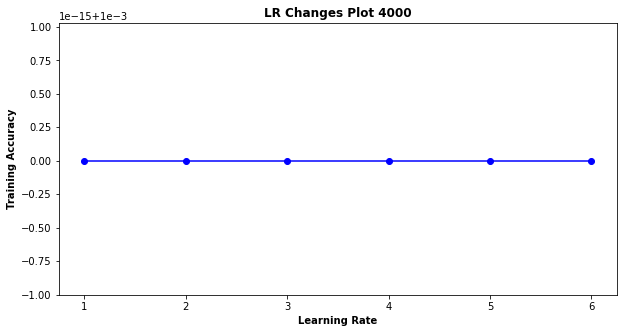

<Figure size 1080x72 with 0 Axes>

test loss from 0 : 1.1164699792861938
Output of network:	 tensor([ 0.2252,  0.1738,  0.1738,  0.1738,  0.5491, 17.8174], device='cuda:0')
Target Values:		 tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  2.7357, 19.1503], device='cuda:0') 

1.1164699792861938
test loss from 1 : 3.920398712158203
Output of network:	 tensor([ 0.3007, 11.3446, 11.2693,  9.3210,  0.2525, 13.3368], device='cuda:0')
Target Values:		 tensor([ 1.8804, 11.9150, 14.2394, 12.3979,  0.0000, 14.8695], device='cuda:0') 

3.920398712158203
test loss from 2 : 17.762266159057617
Output of network:	 tensor([ 0.4570, 16.2283,  0.3882, 15.1440, 13.5807, 11.3669], device='cuda:0')
Target Values:		 tensor([ 0.0000, 19.2888,  0.0000, 20.7424, 14.6478, 19.3897], device='cuda:0') 

17.762266159057617
test loss from 3 : 40.46855163574219
Output of network:	 tensor([ 2.8585, 10.1358,  0.3613, 15.4406,  6.4585,  0.3887], device='cuda:0')
Target Values:		 tensor([ 1.7883, 24.7843,  0.0000, 18.5061,  2.2863,  0.0000], device='cuda:0') 

In [10]:
"""
#################################

NEW NETWORK CREATION/TRAINING

#################################
"""

import time
month_list = ["4000"]
batch_size = 6
# For training
n_epochs = 6


for MONTH_NAME in month_list:
    """ 

        LOAD IN DATA 

    """
    month = MONTH_NAME
    os.chdir(startingDir)
    # Number of subprocesses to use for data loading
    # Using advice of 4 workers per GPU
    # Getting errors with any # of workers > 0
    num_workers = 0

    # Proportion of training set to use for validation and testing
    # Note: this will be split in equal halves, one for validation, one for testing
    valid_and_test_proportion = 0.3


    # Define transforms
    transformations = transforms.Compose([transforms.ToTensor()])
    # Define custom datasets, for training and for testing
    # Note: Will be using 10,000 data for testing, 50,000 data for training in future
    masterfileMLLocation = csvfilesMLLocation + r"/populatedGPPs" + month + ".csv"
    BCIDataset = BCIDataset2(masterfileMLLocation)

    # Obtain indices for training, validation and testing datasets
    num_train = len(BCIDataset)         # Number of data points (csv files to be used)
    indices1 = list(range(num_train))   # indices of [0,num_train) to represent data
    np.random.shuffle(indices1)         # Shuffled indices
    # Splitting training from validation/testing
    split1 = int(np.floor(valid_and_test_proportion * num_train))

    train_indices, valid_and_test_indices = indices1[split1:], indices1[:split1]
    # Splitting validation/testing up into their individual groups
    num_valid_test = len(valid_and_test_indices)

    split2 = int(np.floor(0.5 * num_valid_test))
    valid_indices, test_indices = valid_and_test_indices[split2:], valid_and_test_indices[:split2]

    baseSaveLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new/BCI-ML/Monthly_Data_Summaries_csv"
    os.chdir(baseSaveLocation)
    random.seed()
    idNum = str(random.randint(1,9999999))
    summaryInfoDir = month+"_new"+idNum
    os.mkdir(summaryInfoDir)
    # SAVE Indices in case further training is needed, dont want to overfit the data for future retrains
    os.chdir(baseSaveLocation+"/"+summaryInfoDir)
    titlesIndicesData = ["train_indices","valid_indices","test_indices"]
    indicesFile = "indices_data_" + month +".csv"
    with open(indicesFile,'w',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(titlesIndicesData)
        counter = 0
        for train in train_indices:
            if counter >= len(test_indices): 
                test = -1
            else:
                test = test_indices[counter]
            if counter >= len(valid_indices): 
                valid = -1
            else:
                valid = valid_indices[counter]
            counter = counter + 1
            writer.writerow([train,valid,test])
    os.chdir(startingDir)
    
    # Define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(valid_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    """

        Batch Making

    """
    # Prepare data loaders 
    train_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                               sampler=train_sampler, num_workers=num_workers, pin_memory=True)
    valid_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                               sampler=valid_sampler, num_workers=num_workers, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(BCIDataset, batch_size=batch_size,
                                               sampler=test_sampler, num_workers=num_workers, pin_memory=True)
    """

        Initialize model, optimizer, LR schedueler

    """
    # Initialize model
    model = BCIModel()
    # defining the optimizer
    optimizer = optim.Adam(model.parameters(), lr =0.001)
    # defining the scheduler, to handle learning rate changes
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.98)
    #scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr = 0.002, max_lr=0.012,cycle_momentum=False,step_size_up=100)

    # defining loss function
    criterion = nn.MSELoss()
    print(model)
    # check if CUDA is available
    train_on_gpu = torch.cuda.is_available()

    if not train_on_gpu:
        print('CUDA is not available.  Training on CPU ...')
    else:
        print('CUDA is available!  Training on GPU ...')
        model.cuda()


    torch.cuda.empty_cache()
    # Optimization? Best for inputs that do not change in size (this network)
    # "This flag allows you to enable the inbuilt cudnn auto-tuner to find the best algorithm to use for your hardware"
    torch.backends.cudnn.benchmark = True

    # Check that we are on GPU
    for p in model.parameters():
        print(p.device)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if device.type == 'cuda':
        print(torch.cuda.get_device_name(0))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
    
    """ TRAINING OF MODEL """
    os.chdir(startingDir)
    valid_loss_min = np.Inf 
    #csvfilesMLLocation = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata10000"
    os.chdir(csvfilesMLLocation)
    # Number of epochs to train the model
    # try 10, 100, 500, 1000
    test_loss = 0.0

    train_loss_vals = []
    valid_loss_vals = []
    epochCounter = []
    lr_vals = []
    time_taken_vals = []
    os.chdir(csvfilesMLLocation)
    for epoch in range(1, n_epochs+1):
        epochCounter.append(epoch)
        lr_vals.append(optimizer.param_groups[0]['lr'])    
        # Measurement of epoch times
        start = time.perf_counter()
        print("Epoch #:", epoch)
        # Keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        os.chdir(csvfilesMLLocation)
        for data, target, _ in train_loader:
            data, target = data.float(), target.float()
            # Move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # Clear the gradients fo all optimized variables
            optimizer.zero_grad()
            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # Fixes shape
            output = torch.flatten(output)
            # Calculate the batch loss
            loss = criterion(output, target)
            # Backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
            # Perform a single optimization step (parameter update)
            optimizer.step()
            # Update training loss
            train_loss += loss.item()*data.size(0)

        ######################    
        # validate the model #
        ######################
        model.eval()
        for data, target, _ in valid_loader:
            data, target = data.float(), target.float()
            # Move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # Fixes shape
            output = torch.flatten(output)
            # Calculate the batch loss
            loss = criterion(output, target)
            # Update average validation loss 
            valid_loss += loss.item()*data.size(0)

        # Calculate avearage losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
        # Update validation loss list
        valid_loss_vals.append(valid_loss)
        # Update training loss list
        train_loss_vals.append(train_loss)

        # Print training/validation stats
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_str =(str(valid_loss)).replace(".","-")
            os.chdir(baseSaveLocation+"/"+summaryInfoDir)
            torch.save(model.state_dict(), 'model_BCI_' + month + "_" + valid_loss_str + '.pt')
            valid_loss_min = valid_loss

        # save model no matter performance
        os.chdir(baseSaveLocation+"/"+summaryInfoDir)
        torch.save(model.state_dict(), 'model_BCI_unoptim_' + month + '.pt')
        os.chdir(csvfilesMLLocation)

        # End of time check
        print(f'Time: {time.perf_counter()-start}')
        time_taken_vals.append(time.perf_counter()-start)
        # Time of completion
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time =", current_time)
        print("LR:",optimizer.param_groups[0]['lr'])        
        if epoch >= 40:
            scheduler.step()


    print("Operation Complete")
    
    '''
    Save training data and stats
    '''
    
    os.chdir(baseSaveLocation+"/"+summaryInfoDir)
    
    file1 = open("stats_"+MONTH_NAME+"_"+idNum+".txt","a")
    file1.write("Epochs: " + str(n_epochs) +"\n")
    file1.write("Batch Size: " + str(batch_size))
    file1.close()
    
    titlesTrainingData = ["epoch","train_loss","valid_loss","learning_rate","time_taken"]
    trainFileStats = "training_data_" + month +".csv"
    print(trainFileStats)
    with open(trainFileStats,'w',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(titlesTrainingData)
        for epoch, train, valid, lr, time_t in zip(epochCounter, train_loss_vals, valid_loss_vals, lr_vals, time_taken_vals):
            writer.writerow([epoch,train,valid,lr,time_t])
    os.chdir(startingDir)

    """ 
    CREATION OF TEST RANGE LR PLOT
    """
    fig2=plt.figure(figsize=(10.0, 5.0))
    print(os.getcwd())
    plt.scatter(epochCounter, lr_vals, c="blue")
    plt.plot(epochCounter, lr_vals, c="blue")
    #plt.xlim(0,0.05)
    # plt.ylim(0,100)
    plt.xlabel("Learning Rate", fontweight="semibold")
    plt.ylabel("Training Accuracy", fontweight="semibold")
    plt.title("LR Changes Plot "+month, fontweight="bold")
    plt.figure(figsize=(15,1))
    plt.show()
    my_dpi=96
    os.chdir(baseSaveLocation+"/"+summaryInfoDir)
    fig2.savefig("LR Changes "+month,dpi=my_dpi*5)
    os.chdir(startingDir)
    

    """ 
    TESTING OF MODEL 
    """
    # Print out values and images that have large differences in target/value

    # Track test loss
    test_loss = 0.0
    num_predictions = len(test_indices)
    #import time
    # Puts model will notify all your layers that you are in eval mode, that way, 
    # batchnorm or dropout layers will work in eval mode instead of training mode.
    model.eval()
    tarList = list()
    outList = list()
    fileList= list()
    start = time.perf_counter()
    counter = 0
    os.chdir(csvfilesMLLocation)
    # Iterate over test data
    with torch.no_grad():
        for data, target, file_names in test_loader:
            data, target = data.float(), target.float()
            # Move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # Forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            output = torch.flatten(output)
            # Calculate the batch loss
            loss = criterion(output, target)
            # Update test loss 
            test_loss += loss.item()

            for tar, out, file in zip(target, output, file_names):
                tarList.append(tar.item())
                outList.append(out.item())
                fileList.append(file)

            if counter < 10:
                print("test loss from", counter, ":", loss.item())
                print("Output of network:\t", output)
                print("Target Values:\t\t", target,"\n")

            # Example data tensors
            if counter < 200000:
                #print("loss from this run:", loss.item())
                print(loss.item())
                #print("Output of network:\t", output)
                counterTHIS = 0
                for value in output:
                    counterTHIS += 1
                    #print("Output", counterTHIS, ":", value.item())
                counterTHIS = 0
                for value in target:
                    counterTHIS += 1
                    #print("Target", counterTHIS, ":", value.item())
                #print("Target Values:\t", target,"\n")
                counter += 1
                # CHECK LOss HEEWRE


        print("~~~~~~~~~~~~~~~~~~~~~~~")
        print("tset before divide:",test_loss)
        print("~~~~~~~~~~~~~~~~~~~~~~~")
        test_loss = test_loss/(len(test_loader.sampler)/batch_size)
        print("~~~~~~~~~~~~~~~~~~~~~~~")
        print("len test sampler:",len(test_loader.sampler))
        print("~~~~~~~~~~~~~~~~~~~~~~~")
        print('Test Loss (mean squared error): {:.6f}\n'.format(test_loss))
    print(f'Time: {time.perf_counter()-start}')

    
    os.chdir(baseSaveLocation+"/"+summaryInfoDir)
    titlesTestData = ["targets","outputs","filename"]
    test_loss_str =(str(test_loss)).replace(".","-")
    testFileStats = "test_data_" + month + "_"+ test_loss_str +".csv"
    print(trainFileStats)
    with open(testFileStats,'w',newline='') as file:
        writer = csv.writer(file)
        writer.writerow(titlesTestData)
        for target, output, file in zip(tarList, outList, fileList):
            writer.writerow([target,output,file])
    os.chdir(startingDir)